In [129]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

raw_data = pd.read_csv('sentiment.csv')

raw_data.head()

,sentence,sentiment
0,Sai kha ya her kisi kay bus ki bat nhi hai lak...,Positive
1,sahi bt h,Positive
2,"Kya bt hai,",Positive
3,Wah je wah,Positive
4,Are wha kaya bat hai,Positive


In [130]:
# check the size of the data and its class distribution
sentences = raw_data['sentence']..values.astype('U').tolist()
sentiments = raw_data['sentiment']..values.astype('U').tolist()

sns.countplot(x='sentiment', data=raw_data)
plt.show()

SyntaxError: ignored

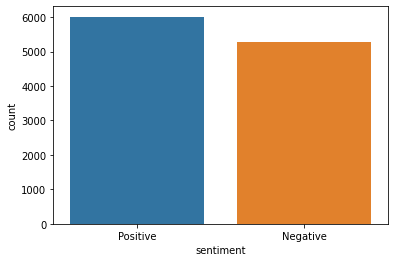

In [131]:
indexNames = raw_data[(raw_data['sentiment'] == "Neative") | (raw_data['sentiment'] == "Neutral")].index
raw_data.drop(indexNames, inplace=True)
sns.countplot(x='sentiment', data=raw_data)
plt.show()

In [132]:
# text cleaning and pre-processing:

X = sentences
Y = sentiments

In [133]:
X[0:5]

['Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus',
 'sahi bt h',
 'Kya bt hai,',
 'Wah je wah',
 'Are wha kaya bat hai']

In [134]:
# Feel free to use different ratios to split the data.
train_text, test_text, train_labels, test_labels = train_test_split(X, Y, test_size=0.20, random_state=42)

In [135]:
# training: tf-idf + logistic regression
max_feature_num = 5000
train_vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = train_vectorizer.fit_transform(train_text)
test_vecs = TfidfVectorizer(max_features=max_feature_num,vocabulary=train_vectorizer.vocabulary_).fit_transform(test_text)

# train model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train_vecs, train_labels)

# test model
test_pred = clf.predict(test_vecs)
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
acc = accuracy_score(test_labels, test_pred)
pre, rec, f1, _ = precision_recall_fscore_support(test_labels, test_pred, average='macro')
print('acc', acc)
print('precision', pre)
print('rec', rec)
print('f1', f1)

acc 0.7729681978798587
precision 0.5148356610142297
rec 0.5161762594489455
f1 0.5154307849355592


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
